In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np

import warnings
warnings.filterwarnings('ignore')

PI2 = 2 * np.pi

np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

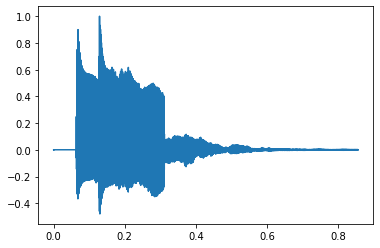

In [2]:
wave = thinkdsp.read_wave('253887__themusicalnomad__positive-beeps.wav')
wave.normalize()
wave.plot()

聽起來就是這樣。

In [3]:
wave.make_audio()

這是一個振幅逐漸減小的4個脈衝序列：

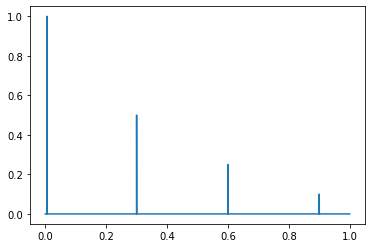

In [4]:
imp_sig = thinkdsp.Impulses([0.005, 0.3, 0.6, 0.9], amps=[1, 0.5, 0.25, 0.1])
impulses = imp_sig.make_wave(start=0, duration=1.0, framerate=wave.framerate)
impulses.plot()

如果我們將波與脈衝進行卷積，則會得到原始聲音的4個偏移的縮放副本。

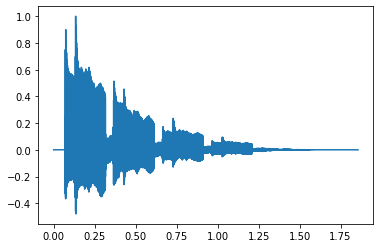

In [5]:
convolved = wave.convolve(impulses)
convolved.plot()

聽起來就是這樣。

In [6]:
convolved.make_audio()

### Amplitude modulation (AM)

前面的示例對AM如何工作提供了一些見解。
首先，我將加載聽起來像AM收音機的錄音。

In [7]:
wave = thinkdsp.read_wave('105977__wcfl10__favorite-station.wav')
wave.unbias()
wave.normalize()
wave.make_audio()

In [8]:
wave.framerate

44100

頻譜如下所示：

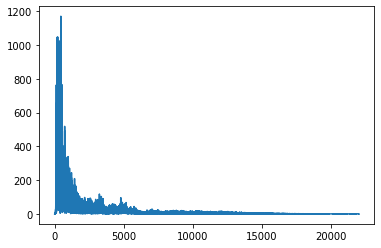

In [9]:
spectrum = wave.make_spectrum()
spectrum.plot()

對於以下示例，查看包括負頻率在內的整個頻譜將更加有用。由於我們是從真實信號開始的，因此頻譜始終是對稱的。

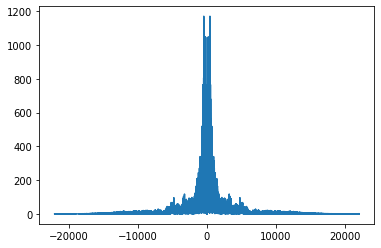

In [10]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

幅度調製的工作原理是將輸入信號乘以“載波”，在本例中為“餘弦”，即10 kHz。

In [11]:
fc= 15000
carrier_sig = thinkdsp.CosSignal(freq= fc)
carrier_wave = carrier_sig.make_wave(duration=wave.duration, framerate= wave.framerate)

In [12]:
modulated = wave * carrier_wave

In [13]:
modulated.make_audio()

AM調製的作用是將頻譜分為兩半，並將頻率偏移10 kHz（請注意，其幅度是前一幅圖的一半）。

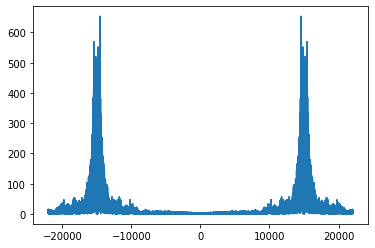

In [14]:
modulated.make_spectrum(full=True).plot()

為了恢復信號，我們再次對其進行調製。

In [15]:
demodulated = modulated * carrier_wave

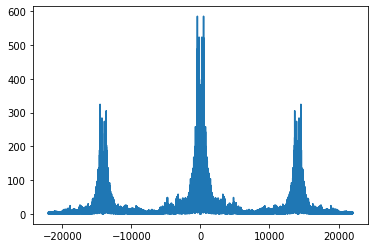

In [16]:
demodulated_spectrum = demodulated.make_spectrum(full=True)
demodulated_spectrum.plot()

如果您現在聽，聽起來不錯。你可能聽不到高頻下的額外成分。

In [17]:
demodulated.make_audio()

如果我們比較輸入和輸出信號，它們非常接近。

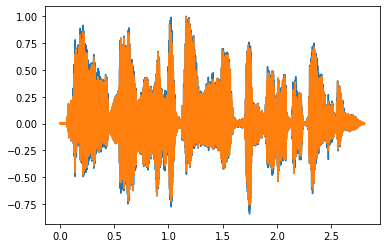

In [18]:
wave.plot()
demodulated.plot()

如果高頻成分困擾您，您可以通過應用低通濾波器來消除它們。在此示例中，我使用了“磚牆”濾波器，該濾波器在10 kHz時會急劇截止。在實際應用中，我們將使用更柔和的過濾器。

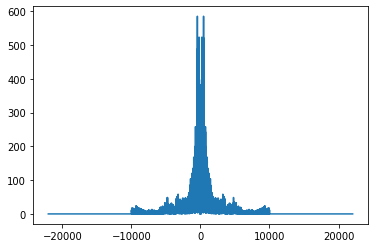

In [19]:
demodulated_spectrum.low_pass(10000)
demodulated_spectrum.plot()

這就是過濾後的聲音

In [20]:
filtered = demodulated_spectrum.make_wave()
filtered.make_audio()

為了了解AM的工作原理，讓我們看看頻域中正在發生什麼。
當我們在時域中將兩個信號相乘時，這對應於頻域中的捲積。載波是10 kHz的餘弦，因此它的頻譜是兩個脈衝，在正負10 kHz

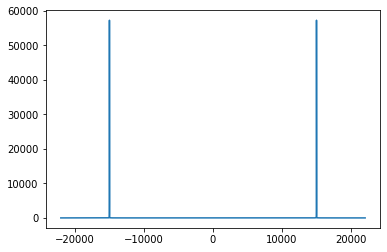

In [21]:
carrier_spectrum = carrier_wave.make_spectrum(full=True)
carrier_spectrum.plot()

正如我們在蜂鳴聲示例中看到的那樣，帶脈衝的捲積會產生移位的縮放副本

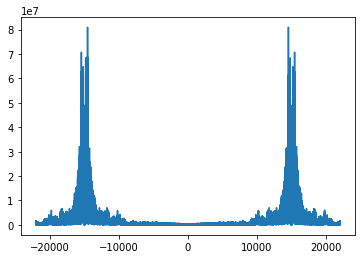

In [22]:
convolved = spectrum.convolve(carrier_spectrum)
convolved.plot()

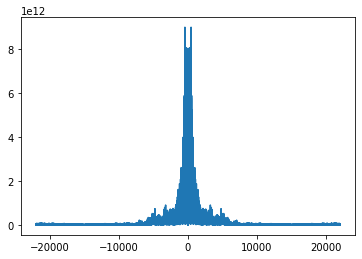

In [24]:
reconvolved = convolved.convolve(carrier_spectrum)
reconvolved.plot()

In [25]:
waveFilname= '105977__wcfl10__favorite-station.wav'
waveFilname= '202006261.wav'
waveFilname= '202006262.wav'

wave= thinkdsp.read_wave(waveFilname)
wave.make_audio()

In [26]:
fc= 10000
carrier_sig=  thinkdsp.CosSignal(freq= fc)
carrier_wave= carrier_sig.make_wave(
                duration=  wave.duration,                                 
                framerate= wave.framerate)
carrier_wave.make_audio()

In [28]:
modulated=wave*carrier_wave
modulated.make_audio()

In [29]:
demodulated= modulated * carrier_wave
demodulated.make_audio()

In [30]:
wave.ys.size

181248

In [32]:
wave= thinkdsp.read_wave(waveFilname)

def pMod(wave, fc=10000):

    carrier_sig=  thinkdsp.CosSignal(freq= fc)
    carrier_wave= carrier_sig.make_wave(
                    duration=  wave.duration,                                 
                    framerate= wave.framerate)

    modulated=wave*carrier_wave

    return modulated

wMod= pMod(wave, fc=15000)
wMod.make_audio()

In [33]:
def pDeMod(modulated, fc=10000):

    demodulated=pMod(modulated, fc)

    return demodulated

wDeMod= pDeMod(wMod, fc=10000)
wDeMod.make_audio()

In [34]:
wDeMod= pDeMod(wMod, fc=15000)
wDeMod.make_audio()